In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

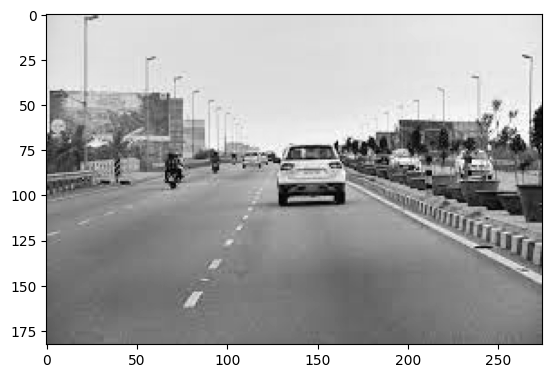

In [2]:
# Reading the image
img = cv2.imread('../.data/images/road-lane-1.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img_gray, cmap="gray")
plt.show()

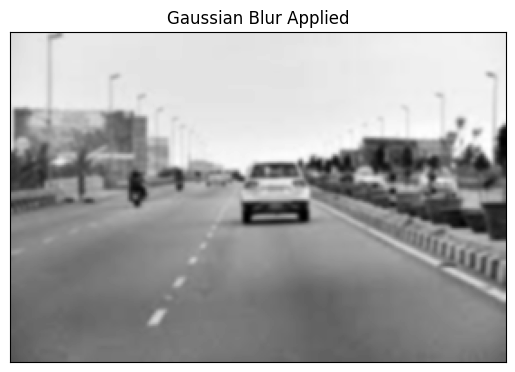

In [3]:
blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

plt.imshow(blur, cmap="gray")
plt.title("Gaussian Blur Applied")
plt.xticks([])
plt.yticks([])
plt.show()

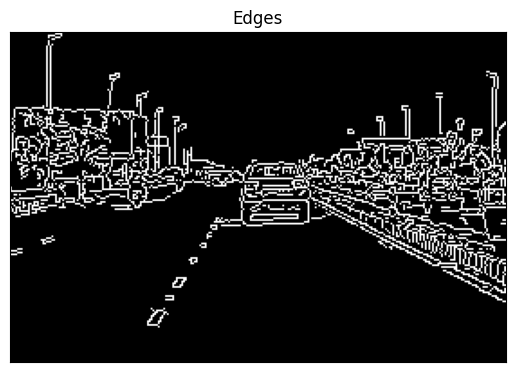

In [4]:
edges = cv2.Canny(img_gray, 100, 200)

plt.imshow(edges, cmap="gray")
plt.title("Edges")
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
height, width = edges.shape

triangle = np.array([
    [(0, height), (width/2, height/2), (width, height-50)]
])

mask = np.zeros_like(edges)
mask = cv2.fillPoly(mask, np.array(triangle, dtype=np.int32), 255)
mask = cv2.bitwise_and(edges, mask)

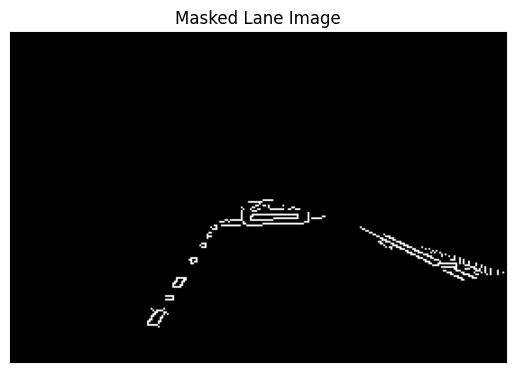

In [6]:
plt.imshow(mask, cmap="gray")
plt.title("Masked Lane Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
lines = cv2.HoughLinesP(mask, rho=6, theta=np.pi/60, threshold=160, minLineLength=40, maxLineGap=25)

In [8]:
line_image = np.zeros_like(img)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)

In [9]:
final_img = cv2.addWeighted(img, 0.8, line_image, 1, 0)

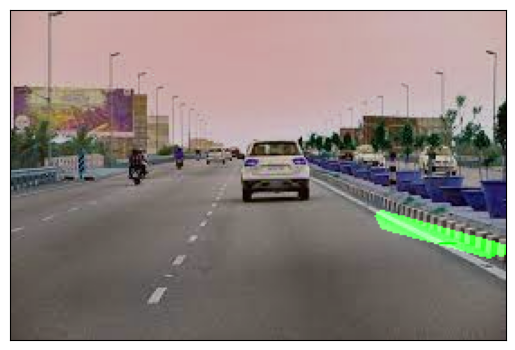

In [10]:
plt.imshow(final_img)
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
def detect_lane(img):
    # Convert it to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Apply gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply canny edge detector
    edges = cv2.Canny(blur, 50, 150)

    # Masking
    mask = np.zeros_like(edges)
    height, width = edges.shape
    triangle = np.array([
        [(0, height), (width/2, height/2), (width, height)]
    ])
    mask = cv2.fillPoly(mask, np.array(triangle, dtype=np.int32), 255)
    mask = cv2.bitwise_and(edges, mask)

    # Default detection
    detection = img
    
    # Apply Hough Transform
    lines = cv2.HoughLinesP(mask, rho=6, theta=np.pi/180, threshold=140, minLineLength=40, maxLineGap=25)

    if lines is not None:
        line_img = np.zeros_like(img)
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 5)

        detection = cv2.addWeighted(img, 0.8, line_img, 1, 0)

    return detection

In [ ]:
def detect_road_lanes(img):
    # Preprocess the image
    ## Convert to HSV

    ## Extract white & yellow

    ## Blurry

    ## Binary

    ## Closed

    # Edge detection
    
    
    # ROI selection

    # Edge detection

    # Hough transoform

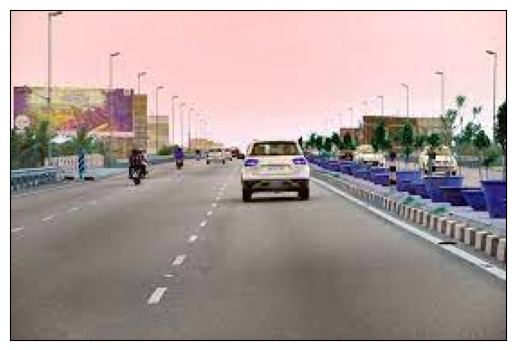

In [12]:
image_path = '../.data/images/road-lane-1.jpg'
img = cv2.imread(image_path)
detection1 = detect_lane(img)
plt.imshow(detection1)
plt.xticks([])
plt.yticks([])
plt.show()

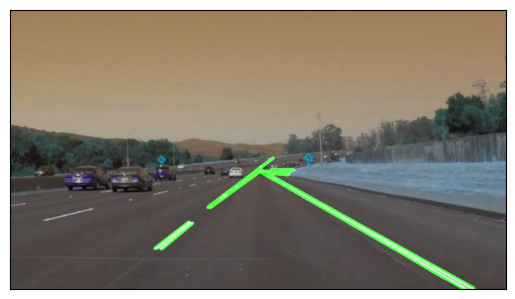

In [13]:
image_path = '../.data/images/road-lane-2.jpg'
img = cv2.imread(image_path)
detection2 = detect_lane(img)
plt.imshow(detection2)
plt.xticks([])
plt.yticks([])
plt.show()

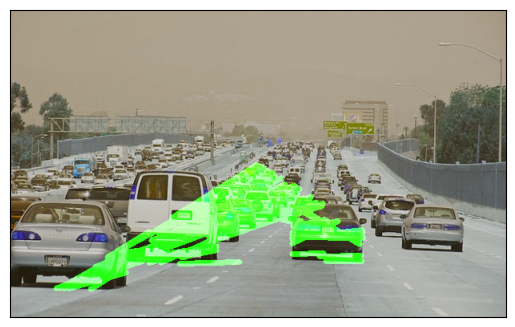

In [14]:
image_path = '../.data/images/road-lane-3.jpg'
img = cv2.imread(image_path)
detection3 = detect_lane(img)
plt.imshow(detection3)
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
def video_road_lane_detector(video_path, out_name, frame_size=(640, 480)):
    # Access the video
    cap =  cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Can't open video")
        return

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('../.data/outputs/'+out_name, fourcc, 20.0, frame_size)
    
    while True:
        ret, video_frame = cap.read()
        
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break
        
        detection = detect_lane(video_frame)

        detection = cv2.resize(detection, frame_size)

        # Write the new video with detections
        out.write(detection)

        cv2.imshow("Detection", detection)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    cap.release()
    cv2.destroyAllWindows()

In [25]:
video_road_lane_detector('../.data/videos/test video 1.mp4', 'out_video_1.avi')

In [26]:
video_road_lane_detector('../.data/videos/test video 2.mp4', 'out_video_2.avi')

Can't receive frame (stream end?). Exiting ...


In [27]:
video_road_lane_detector('../.data/videos/test video 3.mp4', 'out_video_3.avi')